In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import scipy as sp
import seaborn as sns


sns.set(style='ticks', context='paper',
        rc={'font.size': 6, 
            'axes.titlesize': 7,
            'axes.labelsize': 7,
            'axes.labelpad': 2,
            'xtick.labelsize': 5,
            'ytick.labelsize': 5,
            'legend.title_fontsize' : 5.5,
            'legend.fontsize' : 5.5,
            'legend.markerscale': 0.5,
            'axes.spines.top': False,
            'axes.spines.right': False,
            'axes.linewidth': 0.4,
            'xtick.major.width': 0.4,
            'ytick.major.width': 0.4,
            'xtick.major.size': 2.5,
            'ytick.major.size': 2.5,
            'xtick.minor.size': 1.5,
            'ytick.minor.size': 1.5,
            'xtick.minor.width': 0.2,
            'ytick.minor.width': 0.2,
            'figure.constrained_layout.use': True,
            'figure.dpi': 200})


# Remove outlier low-variance points at the final PCs
def is_outlier(i):
    i = np.log(i)
    cutoff = 0.95 * i.iloc[-1]
    return i > cutoff

# Set y-intercept to 1
def get_scaled_var(x):
    i, y = x['n'].values, x['variance'].values
    i, y = np.log(i), np.log(y)
    intercept = LinearRegression().fit(i.reshape(-1, 1), y).intercept_
    intercept = np.exp(intercept)
    return x['variance'] / intercept



/home/wtownle1/.conda/envs/encoder-dimensionality/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()



----- pooling = layerPCA -----



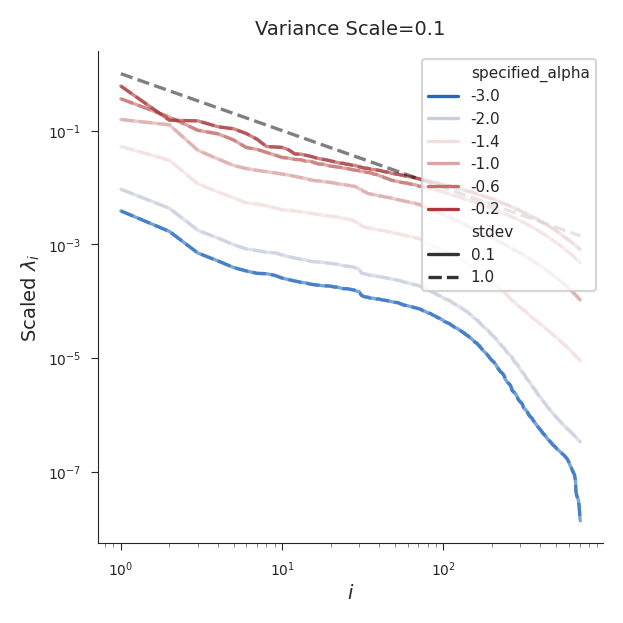

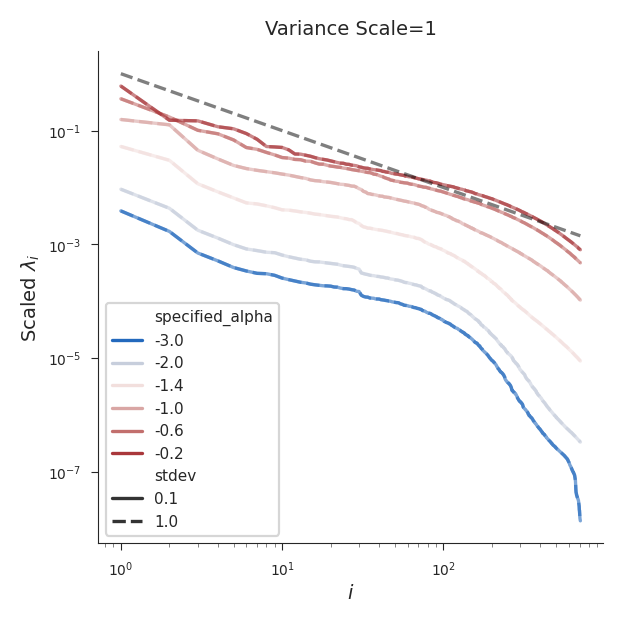

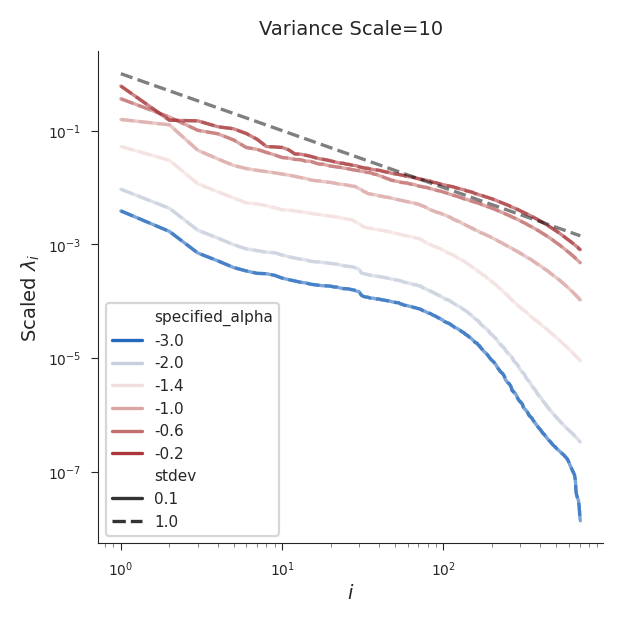

/home/wtownle1/.conda/envs/encoder-dimensionality/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()



----- pooling = PCA_zscore -----



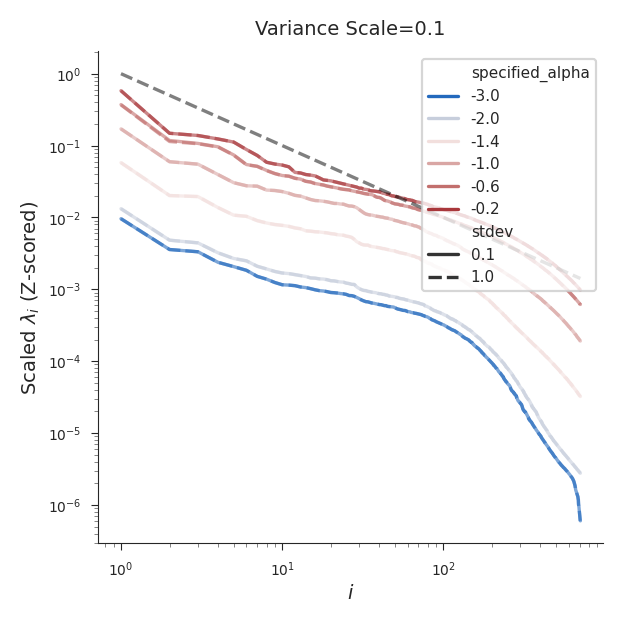

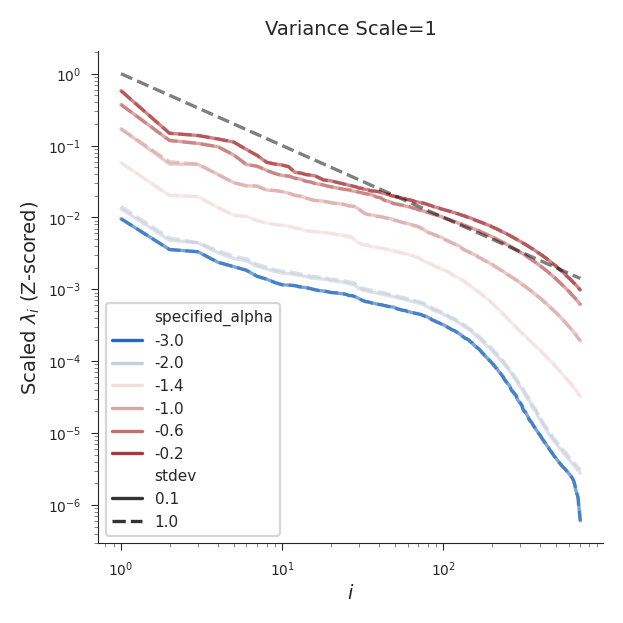

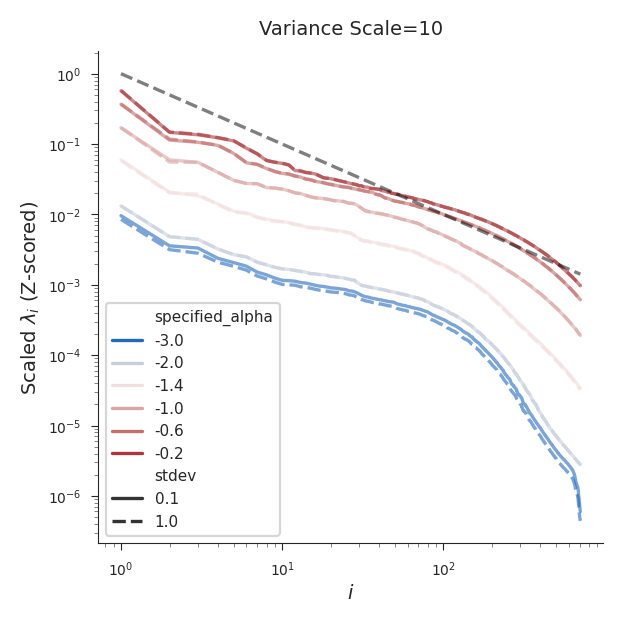

In [3]:
#Unscaled Variance (Eig, variance scale)

# dataset = 'imagenet'
id_columns = ['architecture', 'task', 'stdev', 'kind', 'layer']

pooling = ['layerPCA', 'PCA_zscore']
for pool in pooling:
    metrics = pd.read_csv(f'../../../results_marcc/variance_SVD/eigmetrics_Eig|seed:0|dataset:imagenet|pooling:{pool}|grayscale:False.csv')
    spectra = pd.read_csv(f'../../../results_marcc/variance_SVD/eigspectra_Eig|seed:0|dataset:imagenet|pooling:{pool}|grayscale:False.csv')
    data = pd.merge(spectra, metrics, on=id_columns)
    data['id'] = data[id_columns].sum(axis='columns')
    data['specified_alpha'] = data['kind'].str.split('_').str[-1].astype(float)#.mul(-1)
    data['variance_scale'] = data['task'].str.split('=').str[-1].astype(float)
    data['log_ed'] = np.log10(data['effective dimensionality'])


    # Remove outlier low-variance points at the final PCs
    outlier = data.groupby(id_columns)['n'].transform(is_outlier)
    data = data[~outlier]

    # Set y-intercept to 1
    scaled_var = data.groupby(id_columns).apply(get_scaled_var)
    scaled_var = scaled_var.reset_index(id_columns, drop=True)
    data['scaled_variance'] = scaled_var

    print(f'\n----- pooling = {pool} -----\n')
    
    if pool == 'layerPCA':
        y_lab = r'Scaled $\lambda_i$'
    else:
        y_lab = r'Scaled $\lambda_i$ (Z-scored)'

    var_scales = [0.1, 1, 10]
    for v in var_scales:
        data2 = data[ (data['variance_scale'] == v)]
        
        fig, ax = plt.subplots(figsize=(3, 3))
        sns.lineplot(data=data2, x='n', y='scaled_variance', hue='specified_alpha', style='stdev',
                    units='id', alpha=0.6, estimator=None, #alpha=0.1
                    palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
        ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
        ax.set(xlabel=r'$i$', ylabel=y_lab, xscale='log', yscale='log', title=f'Variance Scale={v}')
        #ax.legend(title=r'$\log{(ED)}$')
        #ax.set_ylim(1e-4, 1e10)
        if v == 0.1:
            ax.legend(loc='upper right')
        else:
            ax.legend(loc='lower left')
        plt.show()


/home/wtownle1/.conda/envs/encoder-dimensionality/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()



----- pooling = layerPCA -----



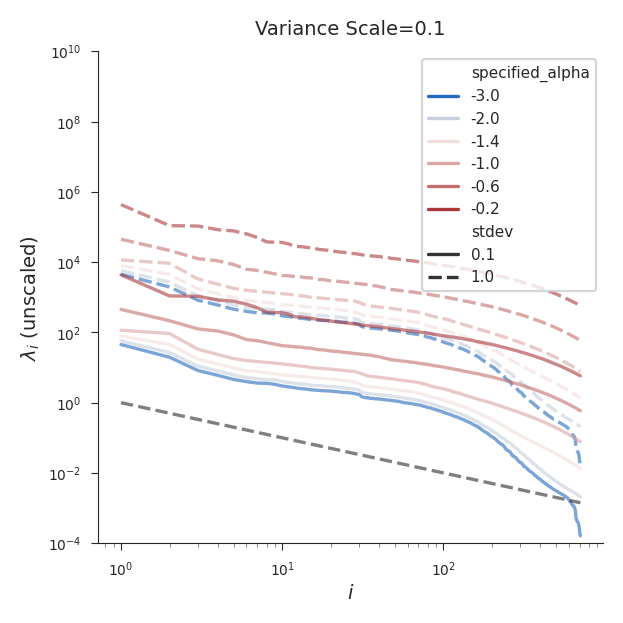

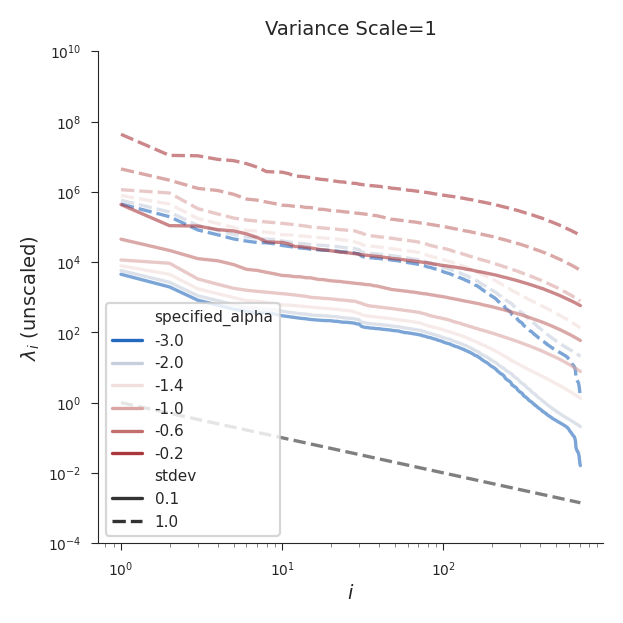

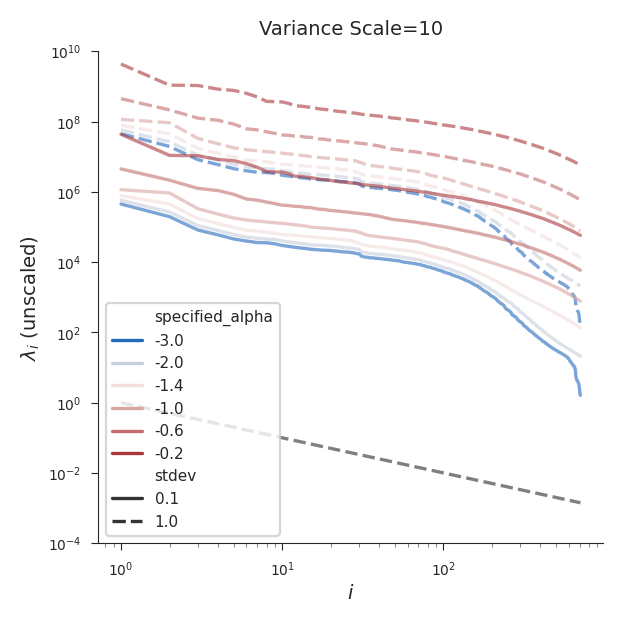

/home/wtownle1/.conda/envs/encoder-dimensionality/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()



----- pooling = PCA_zscore -----



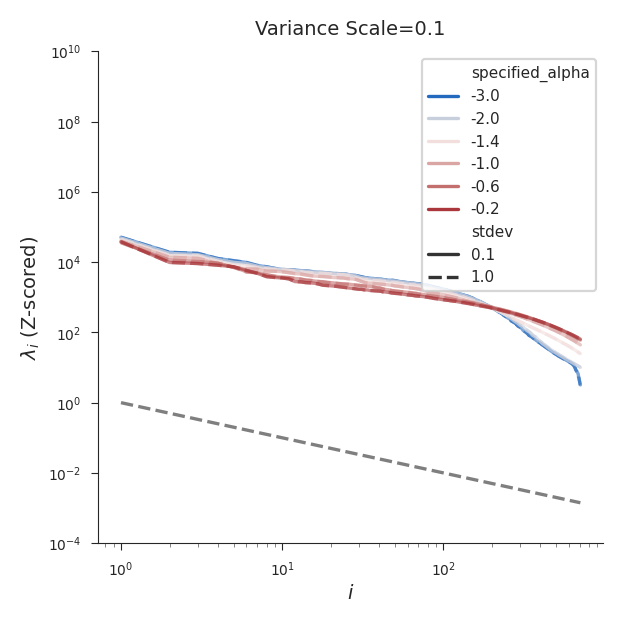

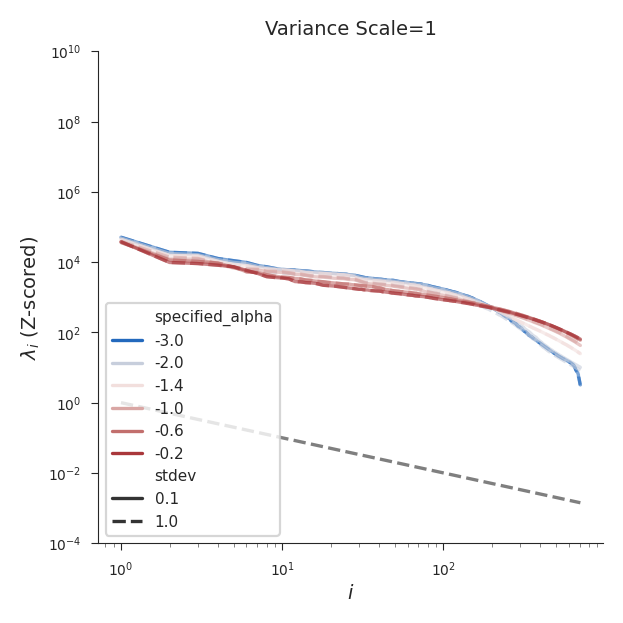

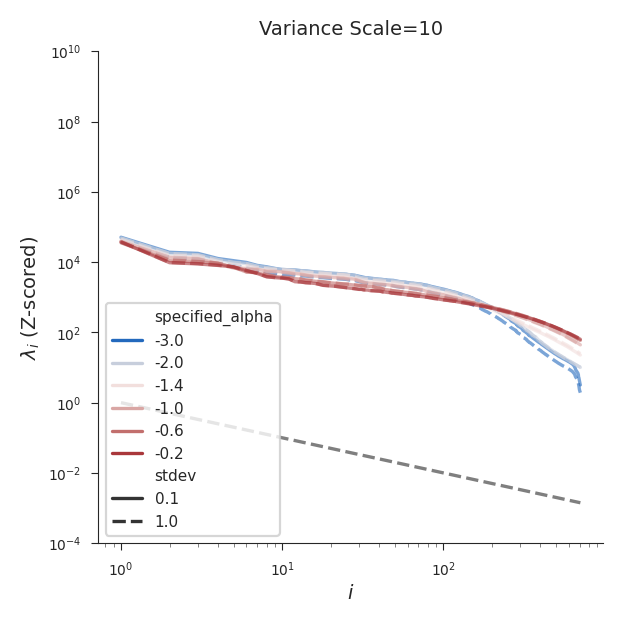

In [84]:
#Unscaled Variance (Eig, variance scale)

# dataset = 'imagenet'
id_columns = ['architecture', 'task', 'stdev', 'kind', 'layer']

pooling = ['layerPCA', 'PCA_zscore']
for pool in pooling:
    metrics = pd.read_csv(f'../../../results_marcc/variance_SVD/eigmetrics_Eig|seed:0|dataset:imagenet|pooling:{pool}|grayscale:False.csv')
    spectra = pd.read_csv(f'../../../results_marcc/variance_SVD/eigspectra_Eig|seed:0|dataset:imagenet|pooling:{pool}|grayscale:False.csv')
    data = pd.merge(spectra, metrics, on=id_columns)
    data['id'] = data[id_columns].sum(axis='columns')
    data['specified_alpha'] = data['kind'].str.split('_').str[-1].astype(float)#.mul(-1)
    data['variance_scale'] = data['task'].str.split('=').str[-1].astype(float)
    data['log_ed'] = np.log10(data['effective dimensionality'])


    # Remove outlier low-variance points at the final PCs
    outlier = data.groupby(id_columns)['n'].transform(is_outlier)
    data = data[~outlier]

    # Set y-intercept to 1
    scaled_var = data.groupby(id_columns).apply(get_scaled_var)
    scaled_var = scaled_var.reset_index(id_columns, drop=True)
    data['scaled_variance'] = scaled_var

    print(f'\n----- pooling = {pool} -----\n')
    
    if pool == 'layerPCA':
        y_lab = r'$\lambda_i$ (Unscaled)'
    else:
        y_lab = r'$\lambda_i$ (Z-scored)'

    var_scales = [0.1, 1, 10]
    for v in var_scales:
        data2 = data[ (data['variance_scale'] == v)]
        
        fig, ax = plt.subplots(figsize=(3, 3))
        sns.lineplot(data=data2, x='n', y='variance', hue='specified_alpha', style='stdev',
                    units='id', alpha=0.6, estimator=None, #alpha=0.1
                    palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
        ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
        ax.set(xlabel=r'$i$', ylabel=y_lab, xscale='log', yscale='log', title=f'Variance Scale={v}')
        #ax.legend(title=r'$\log{(ED)}$')
        ax.set_ylim(1e-4, 1e10)
        if v == 0.1:
            ax.legend(loc='upper right')
        else:
            ax.legend(loc='lower left')
        plt.show()



----- pooling = layerPCA -----



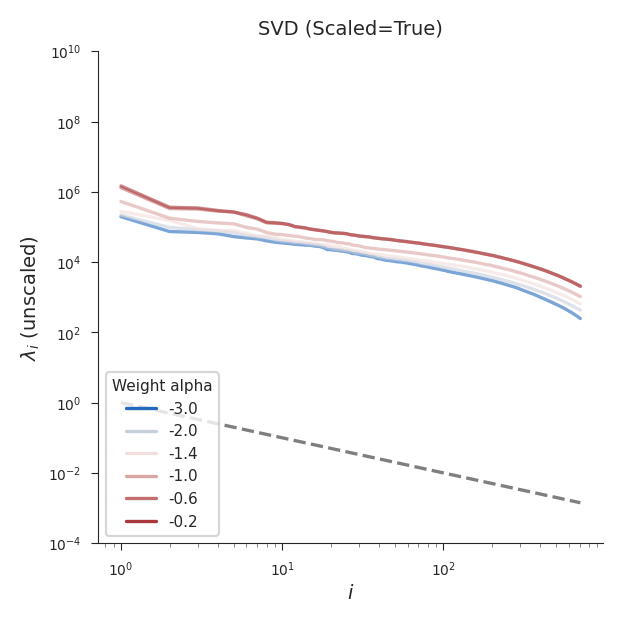

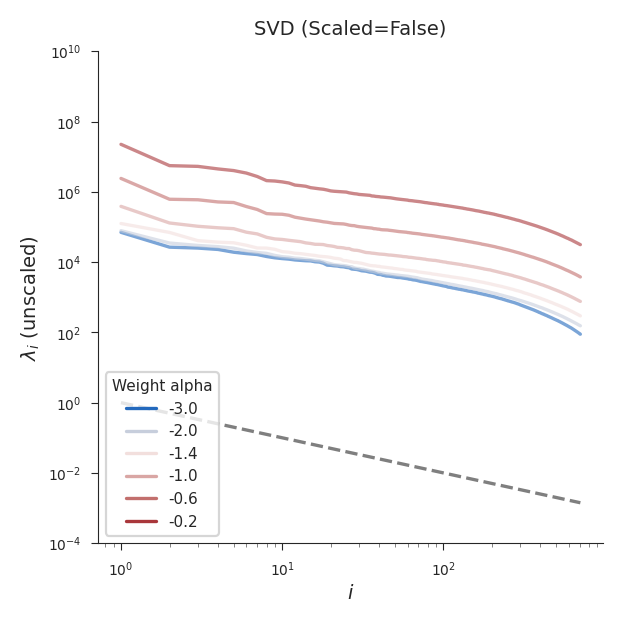


----- pooling = PCA_zscore -----



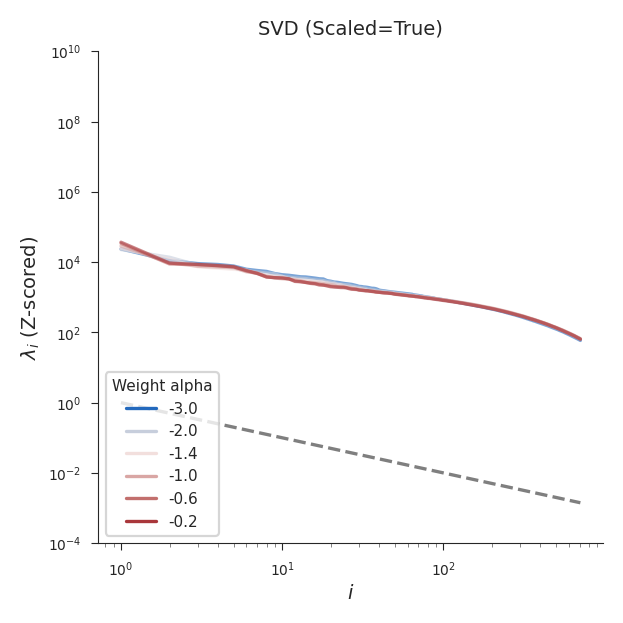

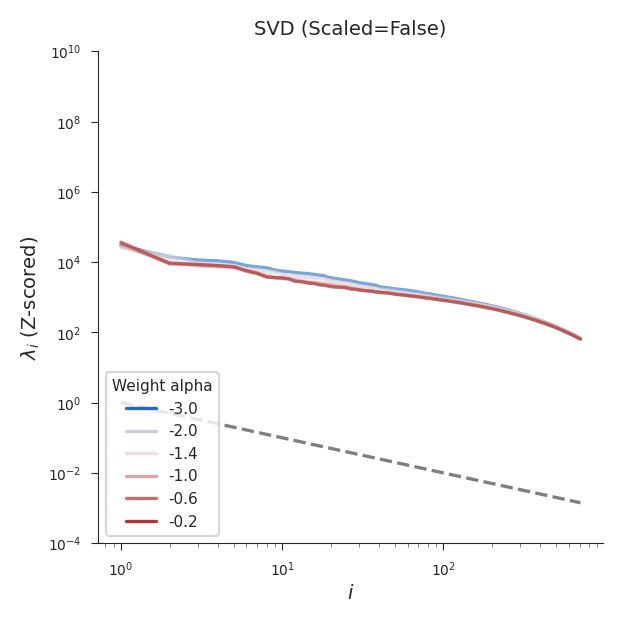

In [85]:
#Unscaled Variance (SVD)

# dataset = 'imagenet'
id_columns = ['architecture', 'task', 'kind', 'source', 'layer']

pooling = ['layerPCA', 'PCA_zscore']
for pool in pooling:
    metrics = pd.read_csv(f'../../../results_marcc/variance_SVD/eigmetrics_SVD|seed:0|dataset:imagenet|pooling:{pool}|grayscale:False.csv')
    spectra = pd.read_csv(f'../../../results_marcc/variance_SVD/eigspectra_SVD|seed:0|dataset:imagenet|pooling:{pool}|grayscale:False.csv')
    data = pd.merge(spectra, metrics, on=id_columns)
    data['id'] = data[id_columns].sum(axis='columns')
    data['specified_alpha'] = data['kind'].str.split('_').str[-1].astype(float)#.mul(-1)
    data['log_ed'] = np.log10(data['effective dimensionality'])


    # Remove outlier low-variance points at the final PCs
    outlier = data.groupby(id_columns)['n'].transform(is_outlier)
    data = data[~outlier]

    # Set y-intercept to 1
    scaled_var = data.groupby(id_columns).apply(get_scaled_var)
    scaled_var = scaled_var.reset_index(id_columns, drop=True)
    data['scaled_variance'] = scaled_var

    print(f'\n----- pooling = {pool} -----\n')
    
    if pool == 'layerPCA':
        y_lab = r'$\lambda_i$ (Unscaled)'
    else:
        y_lab = r'$\lambda_i$ (Z-scored)'

    scale_status = ['True', 'False']
    for s in scale_status:
        data2 = data[ (data['task'].str.split('=').str[-1] == s)]
        #SVD_scaled=True
        
        fig, ax = plt.subplots(figsize=(3, 3))
        sns.lineplot(data=data2, x='n', y='variance', hue='specified_alpha',
                    units='id', alpha=0.6, estimator=None, #alpha=0.1
                    palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
        ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
        ax.set(xlabel=r'$i$', ylabel=y_lab, xscale='log', yscale='log', title=f'SVD (Scaled={s})')
        ax.legend(title=r'Weight alpha', loc='lower left')
        #ax.legend(loc='lower left')
        ax.set_ylim(1e-4, 1e10)
        plt.show()


/home/wtownle1/.conda/envs/encoder-dimensionality/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.


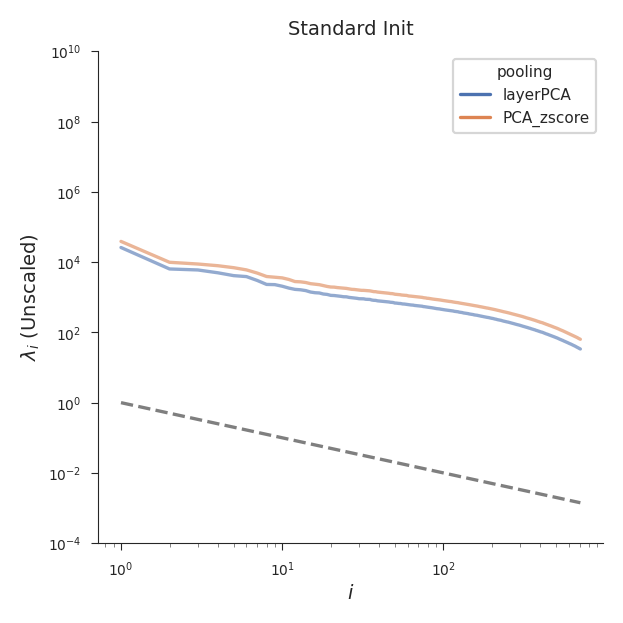

In [91]:
#Unscaled Variance (Standard init)

# dataset = 'imagenet'
id_columns = ['architecture', 'task', 'kind', 'source', 'layer']

pooling = ['layerPCA', 'PCA_zscore']
data = pd.DataFrame()
for pool in pooling:
    metrics = pd.read_csv(f'../../../results_marcc/variance_SVD/eigmetrics_None|seed:0|dataset:imagenet|pooling:{pool}|grayscale:False.csv')
    spectra = pd.read_csv(f'../../../results_marcc/variance_SVD/eigspectra_None|seed:0|dataset:imagenet|pooling:{pool}|grayscale:False.csv')
    data_pool = pd.merge(spectra, metrics, on=id_columns)
    data_pool['id'] = data_pool[id_columns].sum(axis='columns')
    data_pool['pooling'] = pool
    data = pd.concat([data, data_pool], ignore_index=True)

data['log_ed'] = np.log10(data['effective dimensionality'])


# Remove outlier low-variance points at the final PCs
outlier = data.groupby(id_columns)['n'].transform(is_outlier)
data = data[~outlier]

# Set y-intercept to 1
scaled_var = data.groupby(id_columns).apply(get_scaled_var)
scaled_var = scaled_var.reset_index(id_columns, drop=True)
#data['scaled_variance'] = scaled_var


fig, ax = plt.subplots(figsize=(3, 3))
sns.lineplot(data=data, x='n', y='variance', hue='pooling',
            units='id', alpha=0.6, estimator=None, #alpha=0.1
            #palette=sns.color_palette('vlag', as_cmap=False), ax=ax)
            palette=sns.color_palette(), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'$\lambda_i$ (Unscaled)', xscale='log', yscale='log', title='Standard Init')
#ax.legend(title=r'$\log{(ED)}$')
ax.set_ylim(1e-4, 1e10)

plt.show()



----- pooling = layerPCA -----



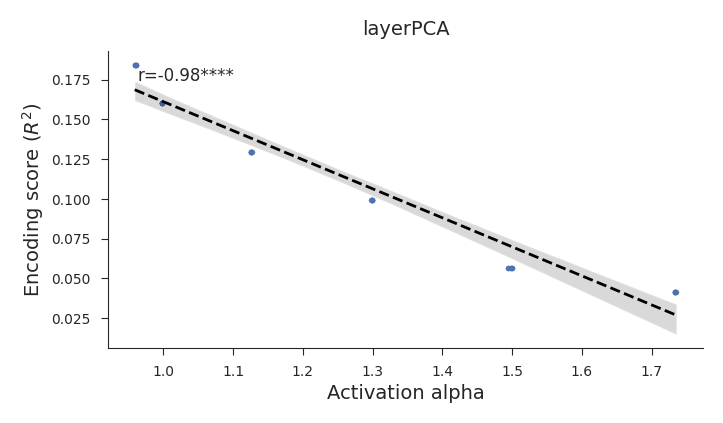

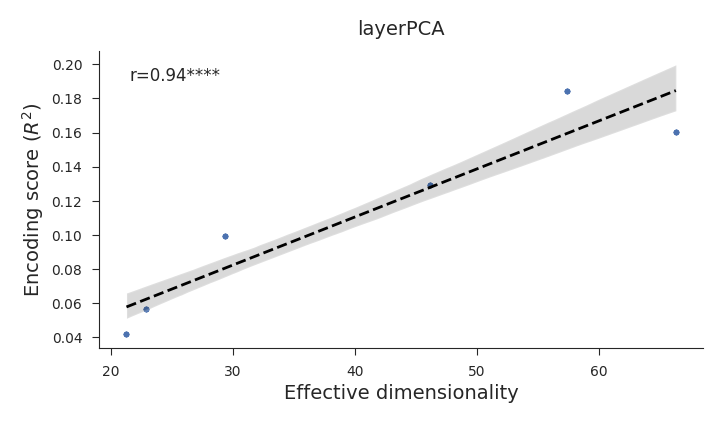

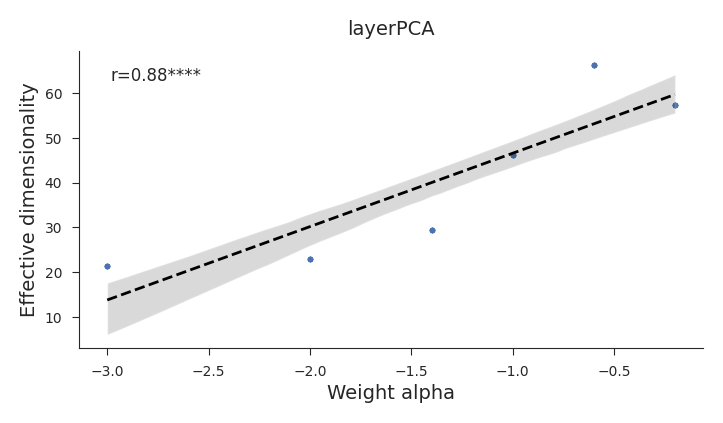


----- pooling = PCA_zscore -----



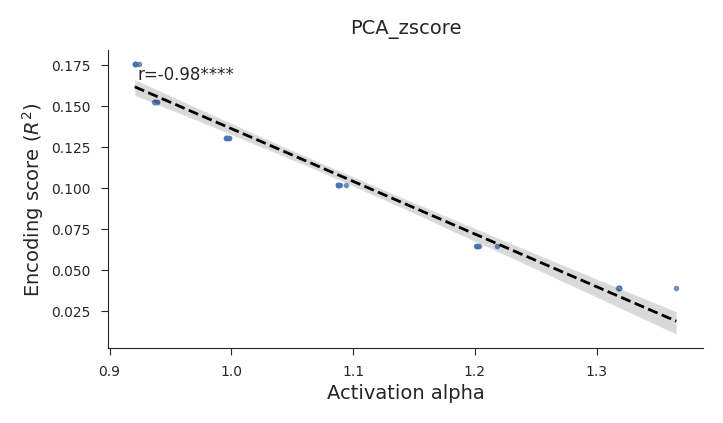

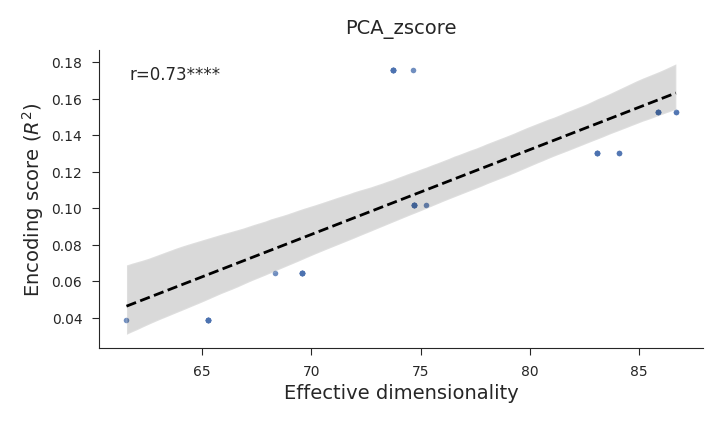

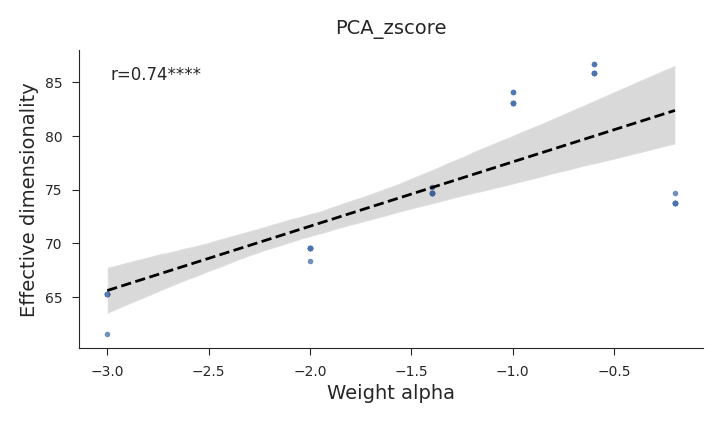

In [5]:
dataset = 'imagenet'
id_columns = ['architecture', 'task', 'stdev', 'kind', 'layer']

pooling = ['layerPCA', 'PCA_zscore']
for pool in pooling:
    metrics = pd.read_csv(f'../../../results_marcc/variance_SVD/eigmetrics_Eig|seed:0|dataset:imagenet|pooling:{pool}|grayscale:False.csv')
    encoding = pd.read_csv(f'../../../results_marcc/variance_SVD/encoding_Eig|seed:0|pooling:{pool}|nPCs:1000|benchmark:dicarlo.MajajHong2015.IT.public-pls.csv')
    if pool == 'PCA_zscore':
        encoding.rename(columns={'kind': 'stdev', 'source': 'kind'}, inplace=True)
    data = pd.merge(encoding, metrics, on=id_columns)
    data['specified_alpha'] = data['kind'].str.split('_').str[-1].astype(float)#.mul(-1)
    data['variance_scale'] = data['task'].str.split('=').str[-1].astype(float)


    print(f'\n----- pooling = {pool} -----\n')
    t = pool
    
    r, p = sp.stats.pearsonr(data['alpha'], data['score'])
    #print('ED p', round(p, 4))
    if p < 0.0001:
        sig = '****'
    elif p < 0.001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = ''
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2))
    sns.regplot(data=data, x='alpha', y='score', 
                logx=False,
                scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
                line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
                ax=ax)
    ax.set(xlabel='Activation alpha', ylabel=r'Encoding score ($R^2$)', title=t)#, xscale='log')
    #ax.set_xlim(0.8, 270)
    ax.text(.05, .9, 'r={:.2f}{}'.format(r, sig), transform=ax.transAxes)
    plt.show()


    r, p = sp.stats.pearsonr(data['effective dimensionality'], data['score'])
    #print('ED p', round(p, 4))
    if p < 0.0001:
        sig = '****'
    elif p < 0.001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = ''
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2))
    sns.regplot(data=data, x='effective dimensionality', y='score', 
                logx=False,
                scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
                line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
                ax=ax)
    ax.set(xlabel='Effective dimensionality', ylabel=r'Encoding score ($R^2$)', title=t)#, xscale='log')
    #ax.set_xlim(0.8, 270)
    ax.text(.05, .9, 'r={:.2f}{}'.format(r, sig), transform=ax.transAxes)
    plt.show()


    r, p = sp.stats.pearsonr(data['specified_alpha'], data['effective dimensionality'])
    #print('ED p', round(p, 4))
    if p < 0.0001:
        sig = '****'
    elif p < 0.001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = ''
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2))
    sns.regplot(data=data, x='specified_alpha', y='effective dimensionality', 
                logx=False,
                scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
                line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
                ax=ax)
    ax.set(xlabel='Weight alpha', ylabel=r'Effective dimensionality', title=t)#, xscale='log')
    #ax.set_xlim(0.8, 270)
    ax.text(.05, .9, 'r={:.2f}{}'.format(r, sig), transform=ax.transAxes)
    plt.show()



#data2 = data[ (data['specified_alpha'] == -1.0)]
#data2 = data2[ (data2['variance_scale'] == 1.0)]

#fig, ax = plt.subplots(1, 1, figsize=(3.5, 2))
#sns.regplot(data=data2, x='stdev', y='score', 
#            logx=False,
#            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
#            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
#            ax=ax)
#ax.set(xlabel='Distribution St.Dev', ylabel=r'Encoding score ($R^2$)')#, xscale='log')
##ax.set_xlim(0.8, 270)
#plt.show()


----- pooling = layerPCA -----



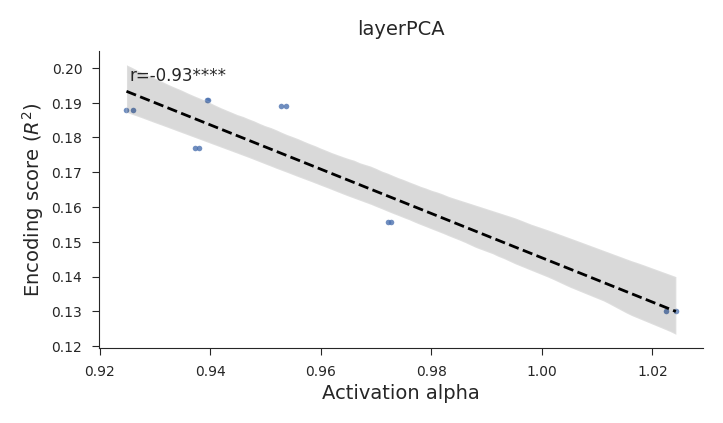

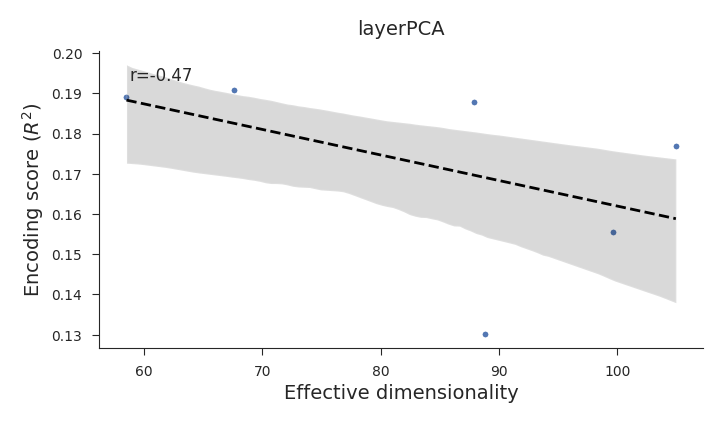

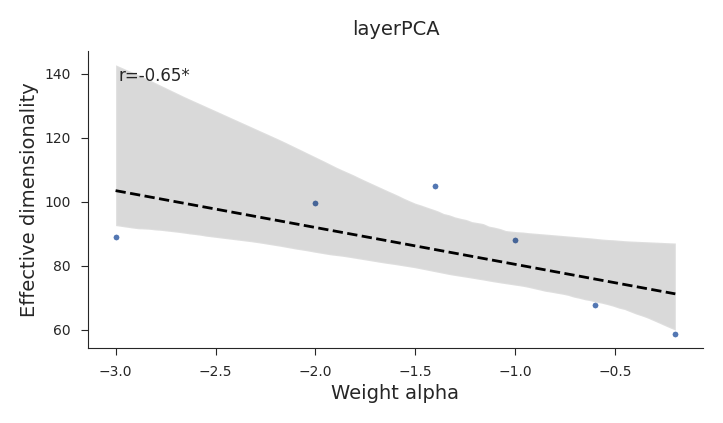


----- pooling = PCA_zscore -----



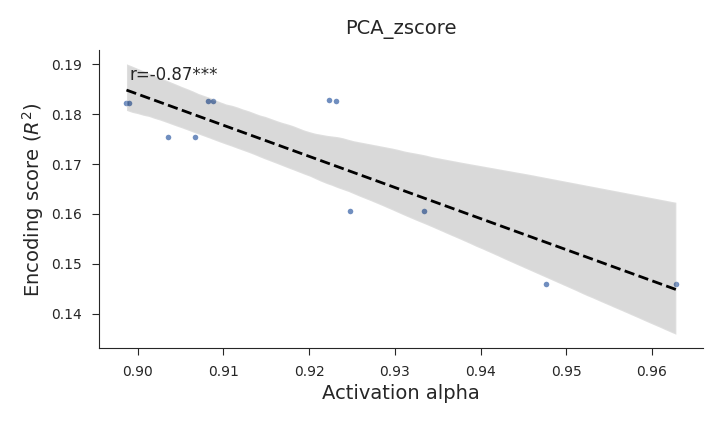

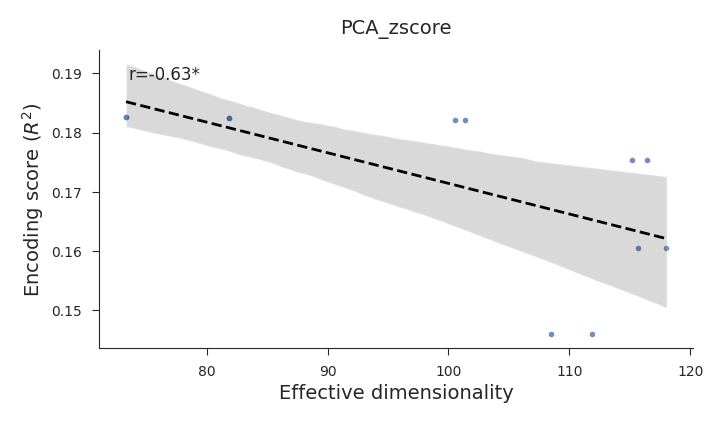

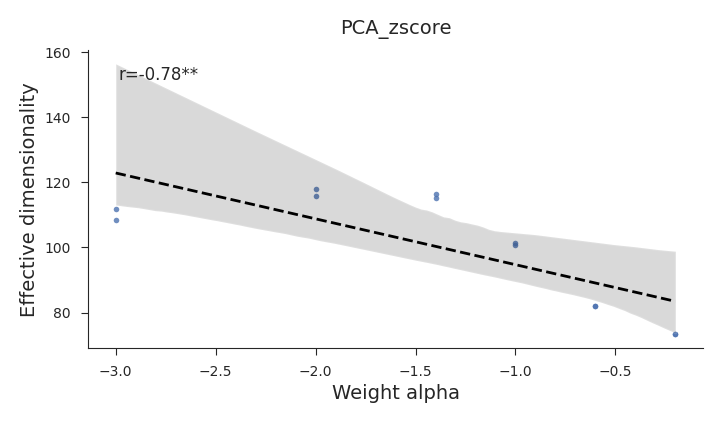

In [6]:
#weight alpha v ED
# - alpha v alpha also has a dip at weight alpha=1
#ED and activation alpha v Encoding score



#Encoding (and such): SVD
dataset = 'imagenet'
id_columns = ['architecture', 'task', 'kind', 'source', 'layer']

pooling = ['layerPCA', 'PCA_zscore']
for pool in pooling:
    metrics = pd.read_csv(f'../../../results_marcc/variance_SVD/eigmetrics_SVD|seed:0|dataset:imagenet|pooling:{pool}|grayscale:False.csv')
    encoding = pd.read_csv(f'../../../results_marcc/variance_SVD/encoding_SVD|seed:0|pooling:{pool}|nPCs:1000|benchmark:dicarlo.MajajHong2015.IT.public-pls.csv')
    data = pd.merge(encoding, metrics, on=id_columns)
    data['specified_alpha'] = data['kind'].str.split('_').str[-1].astype(float)#.mul(-1)
    
    
    print(f'\n----- pooling = {pool} -----\n')
    t = pool
    
    r, p = sp.stats.pearsonr(data['alpha'], data['score'])
    #print('ED p', round(p, 4))
    if p < 0.0001:
        sig = '****'
    elif p < 0.001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = ''
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2))
    sns.regplot(data=data, x='alpha', y='score', 
                logx=False,
                scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
                line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
                ax=ax)
    ax.set(xlabel='Activation alpha', ylabel=r'Encoding score ($R^2$)', title=t)#, xscale='log')
    #ax.set_xlim(0.8, 270)
    ax.text(.05, .9, 'r={:.2f}{}'.format(r, sig), transform=ax.transAxes)
    plt.show()


    r, p = sp.stats.pearsonr(data['effective dimensionality'], data['score'])
    #print('ED p', round(p, 4))
    if p < 0.0001:
        sig = '****'
    elif p < 0.001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = ''
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2))
    sns.regplot(data=data, x='effective dimensionality', y='score', 
                logx=False,
                scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
                line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
                ax=ax)
    ax.set(xlabel='Effective dimensionality', ylabel=r'Encoding score ($R^2$)', title=t)#, xscale='log')
    #ax.set_xlim(0.8, 270)
    ax.text(.05, .9, 'r={:.2f}{}'.format(r, sig), transform=ax.transAxes)
    plt.show()


    r, p = sp.stats.pearsonr(data['specified_alpha'], data['effective dimensionality'])
    #print('ED p', round(p, 4))
    if p < 0.0001:
        sig = '****'
    elif p < 0.001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = ''
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2))
    sns.regplot(data=data, x='specified_alpha', y='effective dimensionality', 
                logx=False,
                scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
                line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
                ax=ax)
    ax.set(xlabel='Weight alpha', ylabel=r'Effective dimensionality', title=t)#, xscale='log')
    #ax.set_xlim(0.8, 270)
    ax.text(.05, .9, 'r={:.2f}{}'.format(r, sig), transform=ax.transAxes)
    plt.show()

